In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import re


Question #1

In [ ]:
dataset = pd.read_csv('/content/Project1-Classification.csv') #Import dataset into Colab

In [ ]:
dataset.head()

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,"'Pure Hockey, the largest hockey retailer in t...","'Pure Hockey, the largest hockey retailer in t...","['acquire', 'agrees', 'nevada', 'retail', 'hoc...",2022-10-21 17:11:22+00:00,['Ein News'],https://www.einnews.com/pr_news/597148062/pure...,hockey,sports
1,'HKO Hockey Canada Sponsorship 20221006\n\nHoc...,'The tally of Hockey Canada’s sponsorship loss...,"['sexual', 'exclusive', 'settlement', 'million...",NaN,['Barbara Shecter'],https://ca.finance.yahoo.com/news/exclusive-ho...,hockey,sports
2,'Canadian Prime Minister Justin Trudeau said W...,'Canadian Prime Minister Justin Trudeau said W...,"['québec', 'surprise', 'trust', 'sexual', 'org...",2022-10-05 00:00:00,['The Athletic Staff'],https://theathletic.com/3659888/2022/10/05/hoc...,hockey,sports
3,'Hockey Canada paid a crisis communications fi...,'Nicholson says that Hockey Canada did not go ...,"['sexual', 'organization', 'million', 'ceo', '...",2022-11-15 00:00:00,['Dan Robson'],https://theathletic.com/3900630/2022/11/15/hoc...,hockey,sports
4,'The Denver Broncos are looking for a new head...,'The Denver Broncos are looking for a new head...,"['beats', 'force', 'season', 'teams', 'anchora...",NaN,"['Parker Seibold', 'The Gazette', 'Gazette File']",https://gazette.com/multimedia/photo-air-force...,hockey,sports


In [ ]:
#Overview of rows and columns in dataset
print("In the dataset there are {} samples and {} features.".format(dataset.shape[0],dataset.shape[1]))

In the dataset there are 3150 samples and 8 features.


In [ ]:
values_a = dataset['full_text'].values

In [ ]:
#Extract alpha numeric charcaters from each row in the column "full_text"

alpha_numeric_count_a = []
for row in dataset['full_text']:
  alpha_numeric_count_a.append(len(re.findall(r'\w', row)))


Text(0.5, 1.0, 'Number of Alpha-Numeric Characters Per Data Point in full_text')

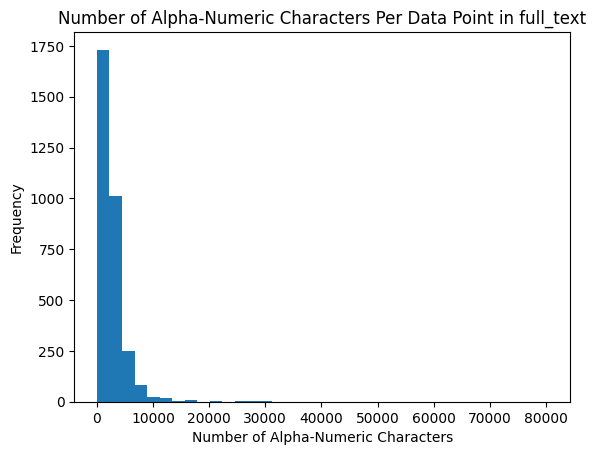

In [ ]:
#Generate the histogram of Alpha-Numeric Characters in full_text

plt.hist(alpha_numeric_count_a, bins=36)

plt.xlabel('Number of Alpha-Numeric Characters')
plt.ylabel('Frequency')
plt.title('Number of Alpha-Numeric Characters Per Data Point in full_text')

In [ ]:
values_b = dataset['leaf_label'].values

In [ ]:
#Extract alpha numeric charcaters from each row in the column "leaf_label"

alpha_numeric_count_b = []
for row in dataset['leaf_label']:
  alpha_numeric_count_b.append(len(re.findall(r'\w', row)))

Text(0, 0.5, 'frequency')

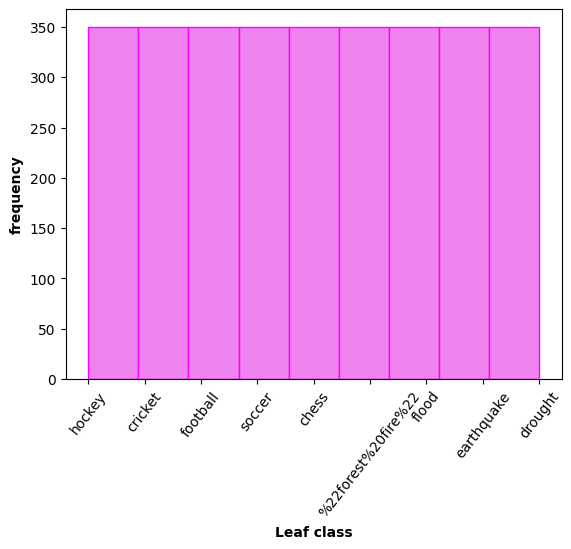

In [ ]:
#Generate the histogram of Alpha-Numeric Characters in leaf_label

#Generate the histogram of leaf cless
plt.hist(dataset['leaf_label'], color='violet', edgecolor='magenta',bins=9)
plt.xlabel('Leaf class', fontweight='bold')
plt.xticks(rotation=52)
plt.ylabel('frequency', fontweight='bold')

In [ ]:
values_c = dataset['root_label'].values

In [ ]:
#Extract alpha numeric charcaters from each row in the column "root_label"

alpha_numeric_count_c = []
for row in dataset['root_label']:
  alpha_numeric_count_c.append(len(re.findall(r'\w', row)))

Text(0.5, 1.0, 'Root Class Frequencies')

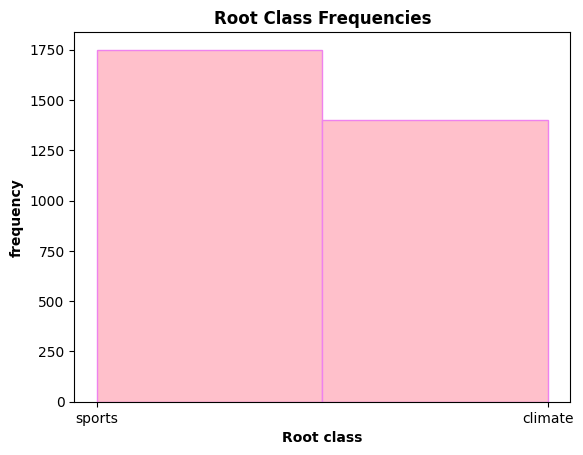

In [ ]:
#Generate the histogram of Alpha-Numeric Characters in root_label


#Generate the histogram of leaf cless
plt.hist(dataset['root_label'], color='pink', edgecolor='violet', bins=2)
plt.xlabel('Root class', fontweight='bold')
plt.ylabel('frequency', fontweight='bold')
plt.title('Root Class Frequencies', fontweight='bold')

Question #2

In [ ]:
import numpy as np
import random

np.random.seed(42)
random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset[["full_text" , "root_label"]], test_size=0.2)
train = train.sort_index()
test = test.sort_index()

In [ ]:
print(train)

                                              full_text root_label
1     'HKO Hockey Canada Sponsorship 20221006\n\nHoc...     sports
2     'Canadian Prime Minister Justin Trudeau said W...     sports
3     'Hockey Canada paid a crisis communications fi...     sports
4     'The Denver Broncos are looking for a new head...     sports
5     'Referee Martin Pronovost wears a Hockey Canad...     sports
...                                                 ...        ...
3144  'The Mandrare river, now a dried up river bed,...    climate
3145  'By Rachel Premack of FreightWaves\n\nYou prob...    climate
3147  'A golf cart on a path at Verrado, an 8,800-ac...    climate
3148  'Jakarta, Dec 25 (EFE).- Dozens of Rohingya re...    climate
3149  'By Nora Buli\n\nOSLO (Reuters) – Norway’s dep...    climate

[2520 rows x 2 columns]


In [ ]:
print(test)

                                              full_text root_label
0     'Pure Hockey, the largest hockey retailer in t...     sports
14    'Hockey Canada finds itself "at a crossroads" ...     sports
17    'HotelPlanner, a hotel booking engine and glob...     sports
22    'GOLDEN VALLEY, MN — We all know student athle...     sports
25    'Adam Fantilli (Michigan Photography)\n\nCALGA...     sports
...                                                 ...        ...
3116  'Country\n\nUnited States of America US Virgin...    climate
3132  'Bill Douglass and Jennifer Satre\n\nThis opin...    climate
3133  '(Left) Photograph of lunar soil and (Right) S...    climate
3140  'Skip to comments.\n\nUkraine's Plan to Win th...    climate
3146  'Manufacturing had a big summer. The CHIPS and...    climate

[630 rows x 2 columns]


In [ ]:
print(train_test_split)

<function train_test_split at 0x7f144867e280>


Question #3


In [ ]:
def clean(text):
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  texter = re.sub(r"<br />", " ", text)
  texter = re.sub(r"&quot;", "\"",texter)
  texter = re.sub('&#39;', "\"", texter)
  texter = re.sub('\n', " ", texter)
  texter = re.sub(' u '," you ", texter)
  texter = re.sub('`',"", texter)
  texter = re.sub(' +', ' ', texter)
  texter = re.sub(r"(!)\1+", r"!", texter)
  texter = re.sub(r"(\?)\1+", r"?", texter)
  texter = re.sub('&amp;', 'and', texter)
  texter = re.sub(r'\b[0-9]+\b\s*', '', texter) #excludes terms that are numbers, do we need to move?
  texter = re.sub('\r', ' ',texter)
  clean = re.compile('<.*?>')
  texter = texter.encode('ascii', 'ignore').decode('ascii')
  texter = re.sub(clean, '', texter)
  if texter == "":
      texter = ""
  return texter

train['full_text'] = train['full_text'].apply(clean)
test['full_text'] = test['full_text'].apply(clean)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english', min_df=3)

#Count vectorization on train dataset
X_train_counts = count_vect.fit_transform(train['full_text'])
X_train_counts.shape

(2520, 17349)

In [ ]:
#Count vectorization on test dataset
X_test_counts = count_vect.transform(test['full_text'])
X_test_counts.shape

(630, 17349)

In [ ]:
import nltk
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:


def ptree_2_morph(POStag):
  Morphy_Tag = {'NN' : 'n', 'JJ' : 'a', 'VB' : 'v', 'RB' : 'r'}
  try:
    return Morphy_Tag[POStag[:2]]
  except:
    return 'n'


from sklearn.feature_extraction.text import TfidfVectorizer

lemm = WordNetLemmatizer()

def lemmatize_word(text):
    return [lemm.lemmatize(word.lower(), pos=ptree_2_morph(tag)) for word, tag in pos_tag(nltk.word_tokenize(text))]

train['lem'] = train['full_text'].apply(lemmatize_word).str.join(' ')
test['lem'] = test['full_text'].apply(lemmatize_word).str.join(' ')

tfidf_vector = TfidfVectorizer(stop_words = 'english', min_df = 3)
tfidf_vector.fit(train['lem'])
 

train_tfidf_matrix = tfidf_vector.transform(train['lem'])
test_tfidf_matrix = tfidf_vector.transform(test['lem'])



In [ ]:
print(train_tfidf_matrix.shape)
print(test_tfidf_matrix.shape)

(2520, 13968)
(630, 13968)


Question #4

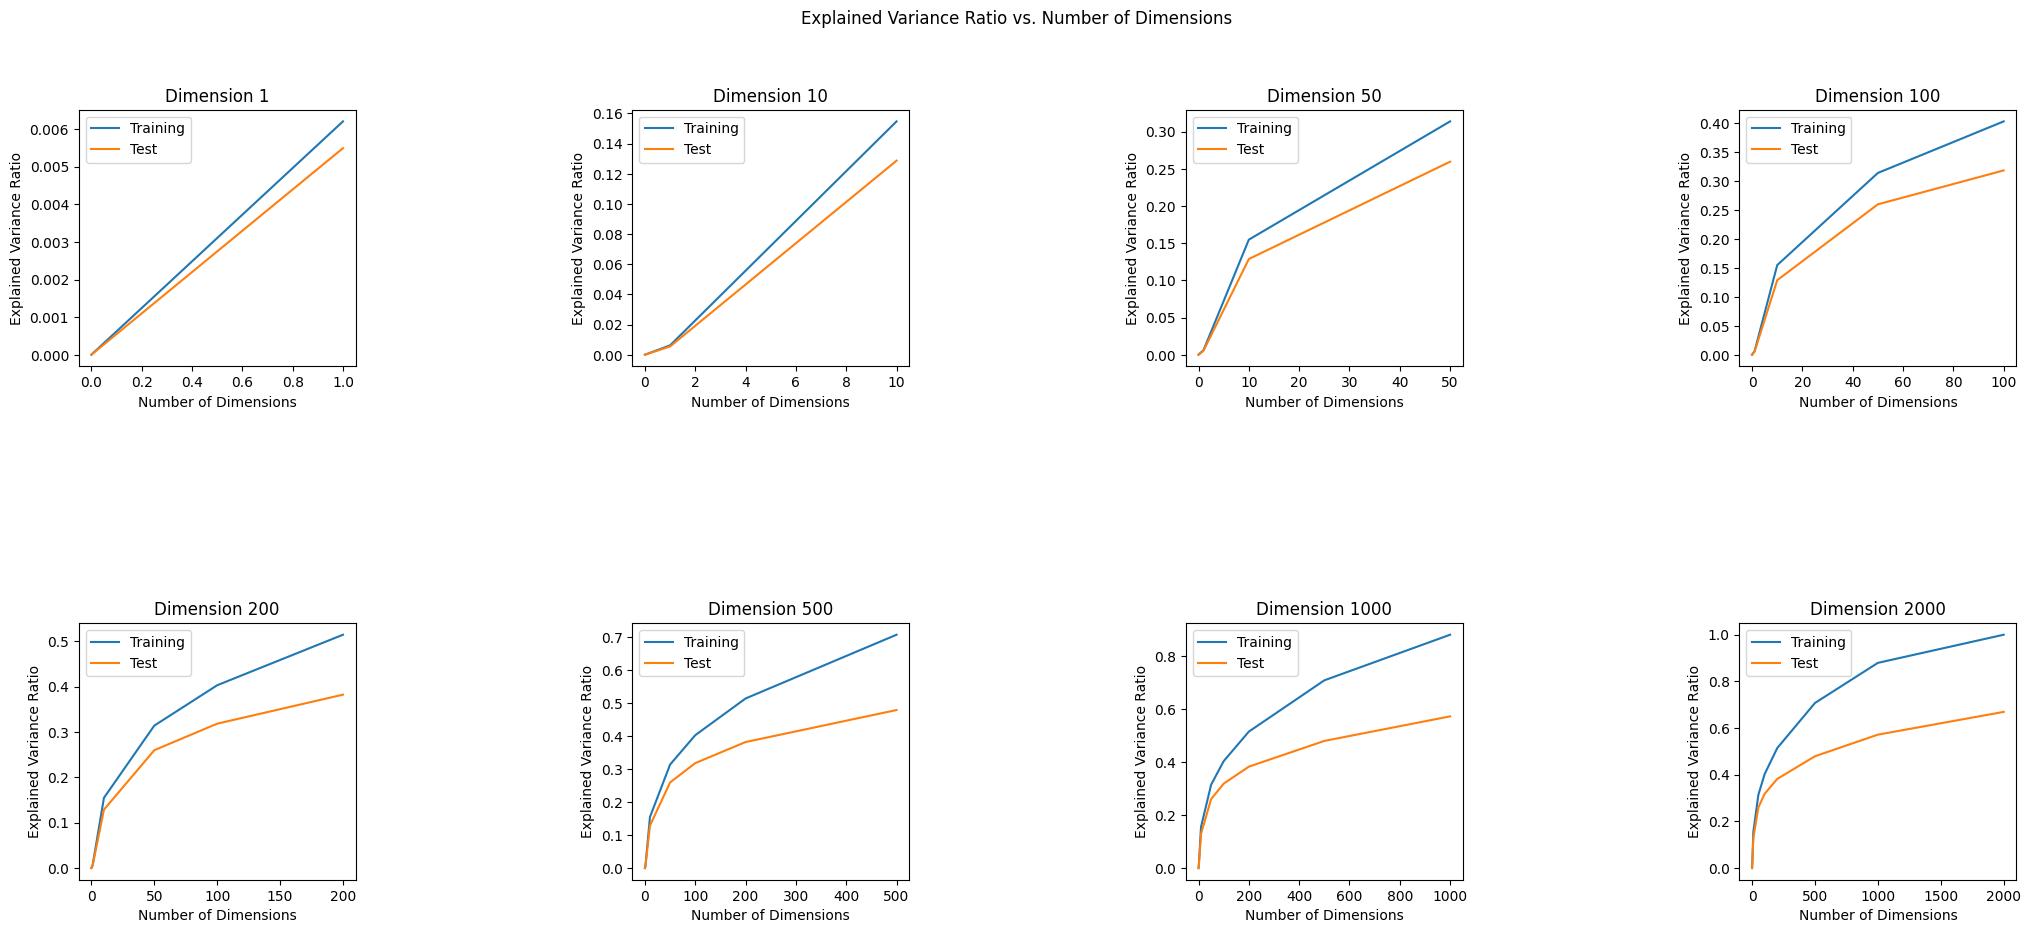

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import NMF

k_dimensions = [1, 10, 50, 100, 200, 500, 1000, 2000]

explained_variance_ratios_train = []
explained_variance_ratios_test = []

for n_components in k_dimensions:
  LSI_multiple = TruncatedSVD(n_components=n_components, random_state = 42)
  LSI_multiple.fit_transform(train_tfidf_matrix)
  explained_variance_ratios_train.append(sum(LSI_multiple.explained_variance_ratio_))
  explained_variance_ratios_test.append(sum(LSI_multiple.transform(test_tfidf_matrix).var(axis=0)))

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))

for i, n_components in enumerate(k_dimensions):
    row = i // 4
    col = i % 4
    axes[row, col].plot([0] + k_dimensions[:i+1], [0] + explained_variance_ratios_train[:i+1], label="Training")
    axes[row, col].plot([0] + k_dimensions[:i+1], [0] + explained_variance_ratios_test[:i+1], label="Test")
    axes[row, col].set_title(f"Dimension {n_components}")
    axes[row, col].set_xlabel("Number of Dimensions")
    axes[row, col].set_ylabel("Explained Variance Ratio")
    axes[row, col].legend()
  
fig.suptitle("Explained Variance Ratio vs. Number of Dimensions")

plt.subplots_adjust(hspace=1, wspace=1)
plt.show()



In [ ]:
#MSE of LSI 
from sklearn.metrics import mean_squared_error

LSI = TruncatedSVD(n_components = 50, random_state=42)
LSI_train = LSI.fit_transform(train_tfidf_matrix)
LSI_test = LSI.transform(test_tfidf_matrix)
U,Sig,VT = randomized_svd(train_tfidf_matrix, n_components=50, random_state=42)
Sig = np.diag(Sig)

train_MSE = mean_squared_error(train_tfidf_matrix.toarray(), U.dot(Sig).dot(VT))
print("Train MSE:", train_MSE)


print("The MSE for the LSI Calculation is:", np.sum(np.array(train_tfidf_matrix - U.dot(Sig).dot(VT))**2))

Train MSE: 4.751132826542204e-05
The MSE for the LSI Calculation is: 1672.368347692768


In [ ]:
#MSE of NMF


nmf = NMF(n_components=50, init='random', random_state=42)
NMF_train = nmf.fit_transform(train_tfidf_matrix)
NMF_test = nmf.transform(test_tfidf_matrix)
H = nmf.components_
print("The MSE for the NMF Calculation is:", np.sum(np.array(train_tfidf_matrix - NMF_train.dot(H))**2))

The MSE for the NMF Calculation is: 1699.2793450697409


Question #5

In [ ]:
#Trainnig two SVM's

from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
import itertools
from sklearn.model_selection import GridSearchCV

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


def classifier_metrics(binary_test,y_pred,name="",average='binary'):
    print("Accuracy score for %s: %f" %(name,accuracy_score(binary_test,y_pred)))
    print("Recall score for %s: %f" % (name,recall_score(binary_test,y_pred,average=average)))
    print("Precision score for %s: %f" % (name,precision_score(binary_test,y_pred,average=average)))
    print("F-1 score for %s: %f" % (name,f1_score(binary_test,y_pred,average=average)))

def plot_roc_curve(binary_test,decision_function,name=""):
    fpr = dict();tpr = dict();roc_auc = dict()
    fpr, tpr, thresholds = roc_curve(binary_test, decision_function)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='green',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate');
    plt.title('%s ROC curve' % name);plt.legend(loc="lower right")

hardSVM = LinearSVC(C=1000,random_state=42)
softSVM = LinearSVC(C=0.0001,random_state=42)
bigger_hardSVM = LinearSVC(C=100000, random_state=42)








In [ ]:
#Making training and testing labels compatible with binary classification

from sklearn.preprocessing import LabelEncoder


#Training labels
trained_dataset = train['root_label']
le = LabelEncoder()
binary_train = le.fit_transform(trained_dataset)


print(binary_train)

#Testing Labels
tested_dataset = test['root_label']
binary_test = le.transform(tested_dataset)

print(binary_test)

[1 1 1 ... 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy score for Soft Margin SVM: 0.582540
Recall score for Soft Margin SVM: 1.000000
Precision score for Soft Margin SVM: 0.582540
F-1 score for Soft Margin SVM: 0.736209
Accuracy score for Hard Margin SVM: 0.957143
Recall score for Hard Margin SVM: 0.942779
Precision score for Hard Margin SVM: 0.982955
F-1 score for Hard Margin SVM: 0.962448
Accuracy score for Bigger Hard Margin SVM: 0.953968
Recall score for Bigger Hard Margin SVM: 0.994550
Precision score for Bigger Hard Margin SVM: 0.931122
F-1 score for Bigger Hard Margin SVM: 0.961792


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

Grid search results for SVM:  {'mean_fit_time': array([0.00909448, 0.00863695, 0.00926032, 0.01465468, 0.07087512,
       0.0998435 , 0.10240436, 0.10286121, 0.09616327]), 'std_fit_time': array([0.00284477, 0.00064576, 0.00024628, 0.00082529, 0.00569722,
       0.01636453, 0.01305865, 0.01796879, 0.0133584 ]), 'mean_score_time': array([0.00109916, 0.00121689, 0.001192  , 0.00126891, 0.00135694,
       0.00154958, 0.00183411, 0.00229073, 0.00179057]), 'std_score_time': array([2.30674873e-05, 9.13086508e-05, 5.64504712e-05, 5.92143441e-05,
       3.71439313e-05, 2.20661906e-04, 1.28239891e-04, 7.08317275e-04,
       8.38945350e-05]), 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}, {'C': 10000}, {'C': 100000}], 

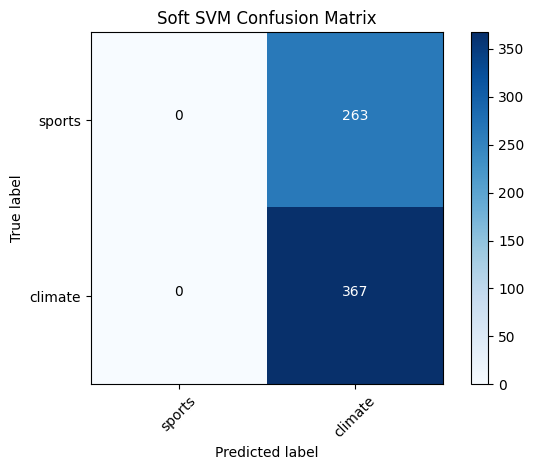

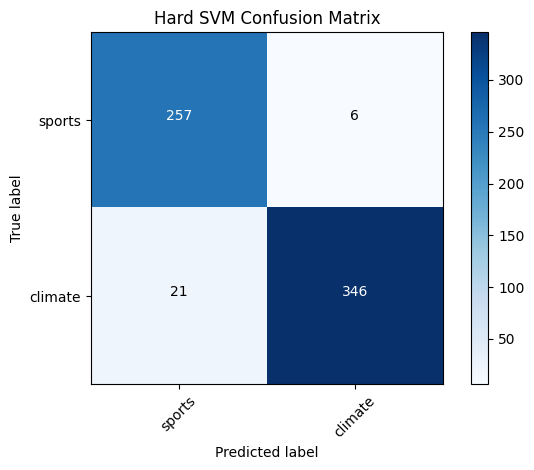

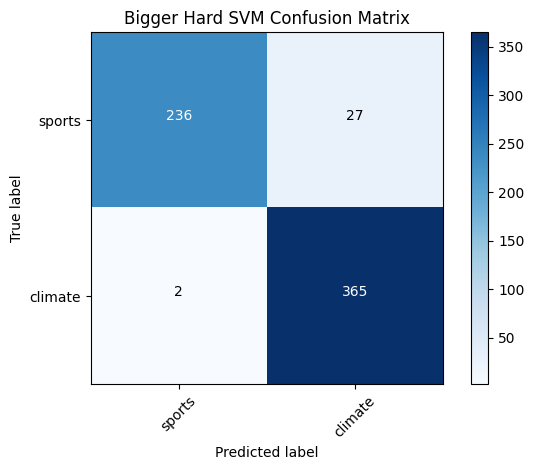

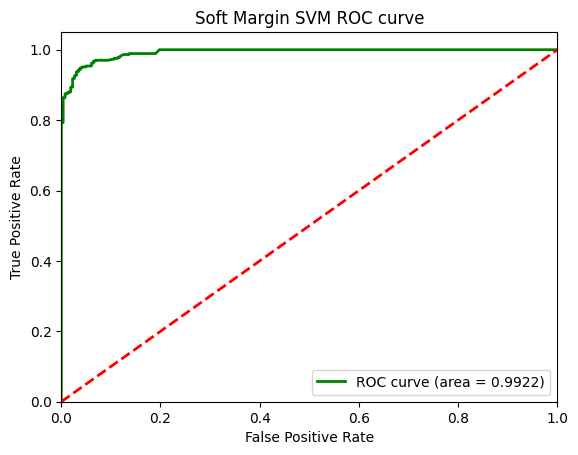

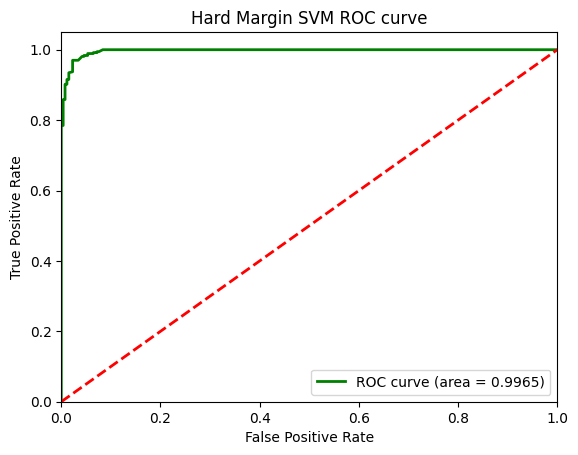

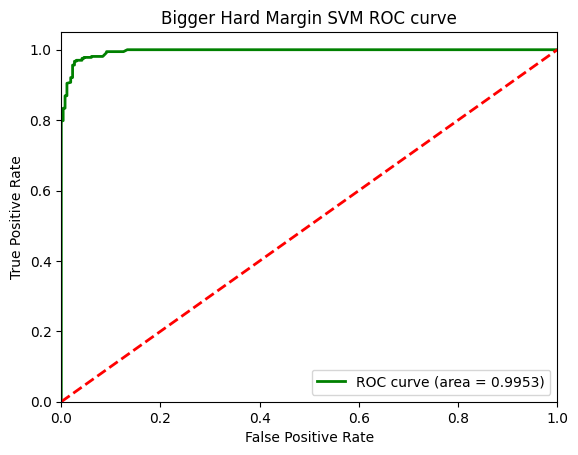

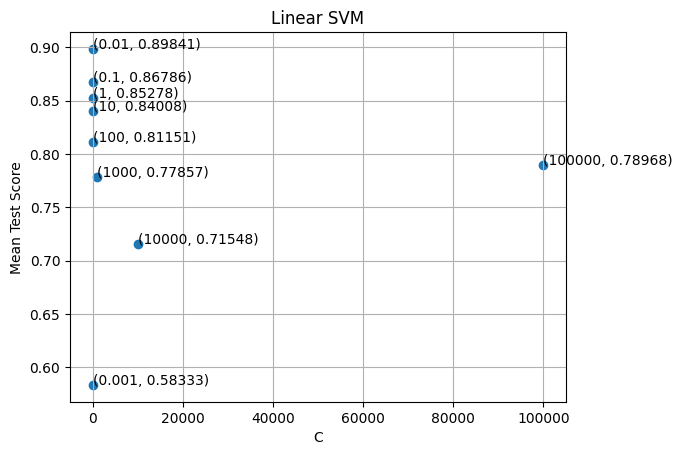

In [ ]:
#Making training and testing labels compatible with binary classification


#Predicting labels for soft SVM
predict_soft_SVM = softSVM.fit(LSI_train, binary_train).predict(LSI_test)

#Predicting labels for hard SVM
predict_hard_SVM = hardSVM.fit(LSI_train, binary_train).predict(LSI_test)

#Predicting labels for bigger hard SVM
predict_bigger_hard_SVM = bigger_hardSVM.fit(LSI_train, binary_train).predict(LSI_test)

classifier_metrics(binary_test, predict_soft_SVM,name="Soft Margin SVM")
classifier_metrics(binary_test, predict_hard_SVM,name="Hard Margin SVM")
classifier_metrics(binary_test, predict_bigger_hard_SVM,name="Bigger Hard Margin SVM")

classes_names = ['sports', 'climate']

#Soft SVM Confusion Matrix
soft_SVM_CM = confusion_matrix(binary_test, predict_soft_SVM)
plt.figure(); plot_confusion_matrix(soft_SVM_CM, classes=classes_names, title='Soft SVM Confusion Matrix')

#Hard SVM Confusion Matrix
hard_SVM_CM = confusion_matrix(binary_test, predict_hard_SVM)
plt.figure(); plot_confusion_matrix(hard_SVM_CM, classes=classes_names, title='Hard SVM Confusion Matrix') 

#Soft SVM Confusion Matrix
bigger_hard_SVM_CM = confusion_matrix(binary_test, predict_bigger_hard_SVM)
plt.figure(); plot_confusion_matrix(bigger_hard_SVM_CM, classes=classes_names, title='Bigger Hard SVM Confusion Matrix') 


#ROC curve for Soft SVM
plot_roc_curve(binary_test,softSVM.decision_function(LSI_test),name="Soft Margin SVM") 

#ROC curve for Hard SVM
plot_roc_curve(binary_test,hardSVM.decision_function(LSI_test),name="Hard Margin SVM") 

#ROC curve for Bigger Hard SVM
plot_roc_curve(binary_test, bigger_hardSVM.decision_function(LSI_test),name="Bigger Hard Margin SVM") 

svc = LinearSVC(random_state=42) 
parameters = {'C':[0.001,0.01,0.1,1,10,100,1000,10000,100000]}
cross_validation = GridSearchCV(svc,parameters,cv=5,scoring='accuracy') 
cross_validation.fit(LSI_train,binary_train)

x = [0.001,0.01,0.1,1,10,100,1000,10000,100000]
y = cross_validation.cv_results_['mean_test_score']
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x,y)
for xy in zip(x, y):                                       
    ax.annotate('(%s, %.5f)' % xy, xy=xy, textcoords='data')
plt.xlabel('C'); plt.ylabel('Mean Test Score'); plt.title("Linear SVM")
plt.grid()

predict_cross_val = cross_validation.best_estimator_.predict(LSI_test)
gamma = cross_validation.best_estimator_.C

print("Grid search results for SVM: ", cross_validation.cv_results_)
print("Best estimator for SVM: ", cross_validation.best_estimator_)
print("Best parameters for SVM: ", cross_validation.best_params_)
print("Best score for SVM: ", cross_validation.best_score_)
print("Best Gamma for SVM: ", gamma)
classifier_metrics(binary_test,predict_cross_val,name="Best Gamma SVM")


Question #6

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Coefficients learned by logistic regression without regularization:  [[  1.76975712  12.78190941  60.73012473  43.75410381   6.49989486
   -5.68369512   7.35308036  12.18743939 -31.81546051  -6.92823429
   -1.80377364  23.31694572  19.23613945 -18.02421205 -16.4130689
  -19.94681558 -21.47649713 -28.3902669  -17.79414993 -22.56577839
    1.66625955  -3.46021142  13.02714656  -4.5635832  -14.7748536
   19.11576627 -10.60058738   0.30331548  14.3414196    1.59648461
   -1.19967493 -10.81693319   0.09999286  -7.88951051  -7.37959255
    3.60054815  -4.33522681  -4.36498906  -5.25246384  11.85742932
  -16.24290137  12.76556483  -7.54973064   0.10796036  14.11697096
    5.82720823   3.97526174  13.89519307  14.5613732    1.92412693]]
Accuracy score for Logistic Regression w/o Regularization: 0.966667
Recall score for Logistic Regression w/o Regularization: 0.956403
Precision score for Logistic Regression w/o Regularization: 0.985955
F-1 score for Logistic Regression w/o Regularization: 0.97

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Grid search results for logistic regression with L2 regularization:  {'mean_fit_time': array([0.00731187, 0.00669951, 0.00557733, 0.00656748, 0.01230731,
       0.01380038, 0.03112707, 0.05284181, 0.05757375, 0.05326023]), 'std_fit_time': array([8.96636964e-05, 5.48123017e-05, 8.64032352e-05, 2.50106203e-04,
       2.56205025e-03, 1.85579780e-03, 7.46815108e-03, 3.95714769e-03,
       1.21064973e-02, 8.65410237e-03]), 'mean_score_time': array([0.00110774, 0.00100985, 0.00098038, 0.0010159 , 0.00115228,
       0.00111613, 0.00122294, 0.0011869 , 0.00120006, 0.00120115]), 'std_score_time': array([6.37446571e-05, 1.18363239e-05, 1.85249855e-05, 2.92301567e-05,
       4.97542502e-05, 6.91439529e-05, 4.40293988e-06, 1.07000813e-05,
       1.63539157e-05, 9.16842668e-06]), 'param_C': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                   10000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
     

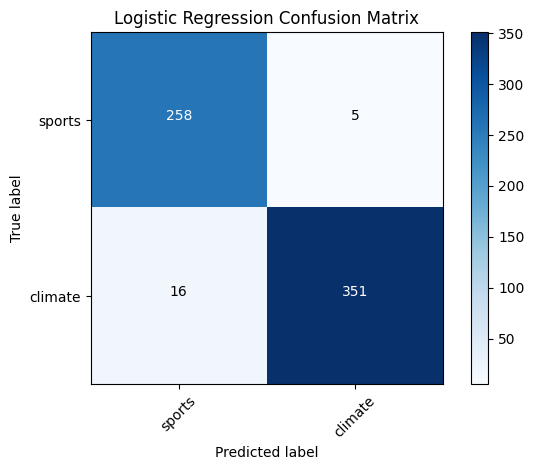

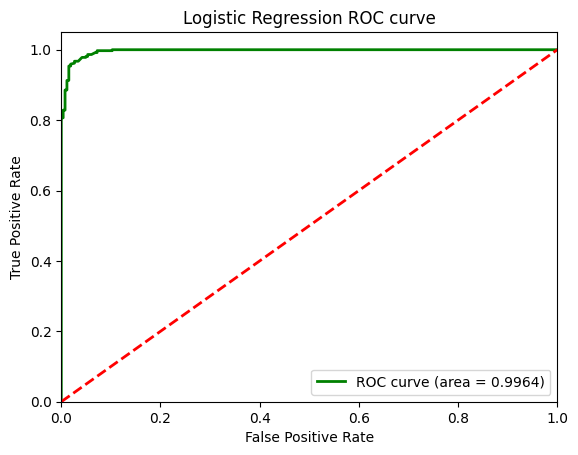

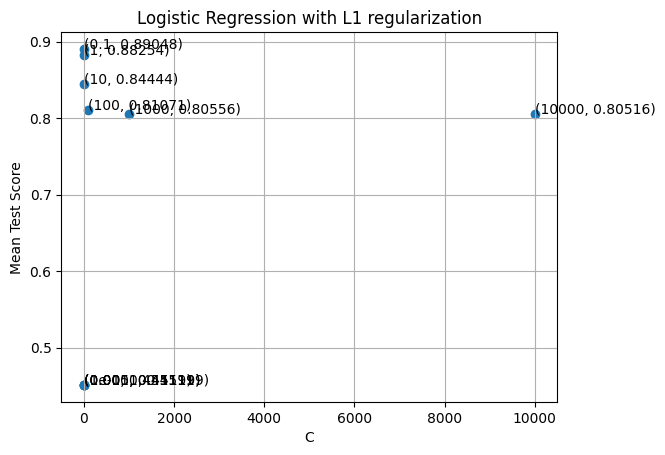

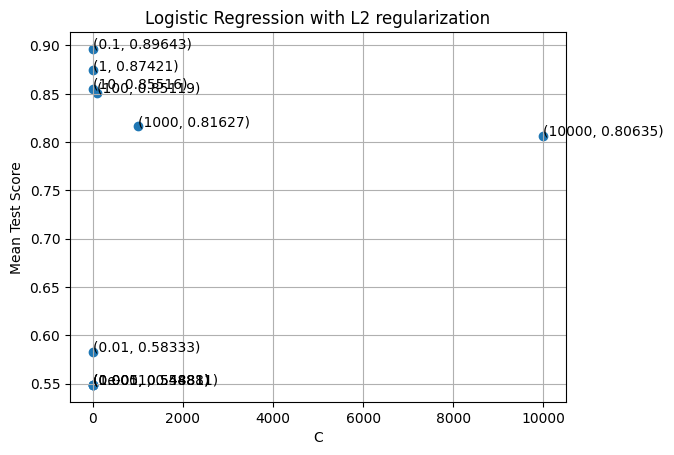

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=10**10, random_state=42)
predict_log_reg = log_reg.fit(LSI_train, binary_train).predict(LSI_test)
print("Coefficients learned by logistic regression without regularization: ", log_reg.coef_)

#Logistic Regression without Regularization
classifier_metrics(binary_test, predict_log_reg, name= "Logistic Regression w/o Regularization")
log_reg_confusion_matrix = confusion_matrix(binary_test, predict_log_reg) 
plt.figure(); plot_confusion_matrix(log_reg_confusion_matrix, classes=classes_names, title='Logistic Regression Confusion Matrix')
plot_roc_curve(binary_test, log_reg.decision_function(LSI_test),name="Logistic Regression")

#Logistic Regression with L1 Regularization
parameters_L = {'C':[0.00001, 0.0001, 0.001,0.01,0.1,1,10,100,1000,10000]}
log_reg_L1 = LogisticRegression(penalty='l1', solver= 'liblinear', random_state=42)
cross_validation_L1 = GridSearchCV(log_reg_L1, parameters_L, cv=5, scoring='accuracy')
predict_log_reg_L1 = cross_validation_L1.fit(LSI_train, binary_train).best_estimator_.predict(LSI_test)
best_gamma_L1 = cross_validation_L1.best_estimator_.C

x = [0.00001, 0.0001, 0.001,0.01,0.1,1,10,100,1000,10000]
y = cross_validation_L1.cv_results_['mean_test_score']
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x,y)
for xy in zip(x, y):                                       
    ax.annotate('(%s, %.5f)' % xy, xy=xy, textcoords='data')
plt.xlabel('C'); plt.ylabel('Mean Test Score'); plt.title("Logistic Regression with L1 regularization")
plt.grid()

print("Grid search results for logistic regression with L1 regularization: ", cross_validation_L1.cv_results_)
print("Best estimator for logistic regression with L1 regularization: ", cross_validation_L1.best_estimator_)
print("Best parameters for logistic regression with L1 regularization: ", cross_validation_L1.best_params_)
print("Best score for logistic regression with L1 regularization: ", cross_validation_L1.best_score_)
print("Best Gamma for logistic regression with L1 regularization: ", best_gamma_L1)
print("Coefficients learned by logistic regression with L1 regularization: ", cross_validation_L1.best_estimator_.coef_)
classifier_metrics(binary_test, predict_log_reg_L1 ,name="Logistic Regression with L1 regularization")

#Logistic Regression with L2 Regularization

log_reg_L2 = LogisticRegression(penalty='l2', random_state=42)
cross_validation_L2 = GridSearchCV(log_reg_L2, parameters_L, cv=5, scoring='accuracy')
predict_log_reg_L2 = cross_validation_L2.fit(LSI_train, binary_train).best_estimator_.predict(LSI_test)
best_gamma_L2 = cross_validation_L2.best_estimator_.C

x = [0.00001, 0.0001, 0.001,0.01,0.1,1,10,100,1000,10000]
y = cross_validation_L2.cv_results_['mean_test_score']
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x,y)
for xy in zip(x, y):                                       
    ax.annotate('(%s, %.5f)' % xy, xy=xy, textcoords='data')
plt.xlabel('C'); plt.ylabel('Mean Test Score'); plt.title("Logistic Regression with L2 regularization")
plt.grid()

print("Grid search results for logistic regression with L2 regularization: ", cross_validation_L2.cv_results_)
print("Best estimator for logistic regression with L2 regularization: ", cross_validation_L2.best_estimator_)
print("Best parameters for logistic regression with L2 regularization: ", cross_validation_L2.best_params_)
print("Best score for logistic regression with L2 regularization: ", cross_validation_L2.best_score_)
print("Best Gamma for logistic regression with L2 regularization: ", best_gamma_L2)
print("Coefficients learned by logistic regression with L2 regularization: ", cross_validation_L2.best_estimator_.coef_)
classifier_metrics(binary_test, predict_log_reg_L2 ,name="Logistic Regression with L2 regularization")


Question #7

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Train GaussianNB classifier

gnb = GaussianNB().fit(LSI_train, binary_train)
predicted = gnb.predict(LSI_test)

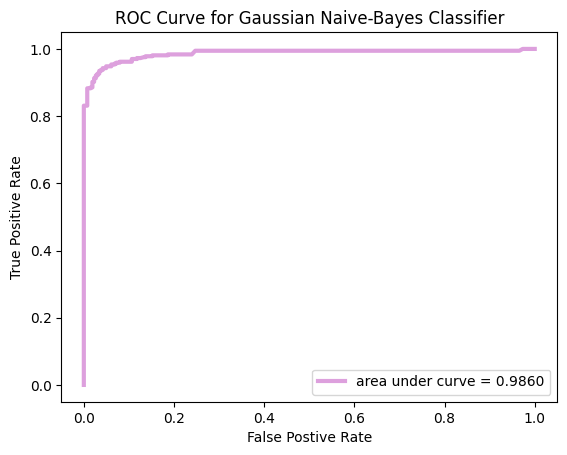

In [ ]:
from sklearn.metrics import roc_curve, auc

#ROC curve for GaussianNB

gnb_score = gnb.predict_proba(LSI_test)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(binary_test, gnb_score[:, 1])
roc_auc = auc(fpr_gnb,tpr_gnb)

plt.plot(fpr_gnb, tpr_gnb, lw=3, color='plum',label= 'area under curve = %0.4f' %  roc_auc)
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive-Bayes Classifier')
plt.legend()

Text(41.25, 0.5, 'True Label')

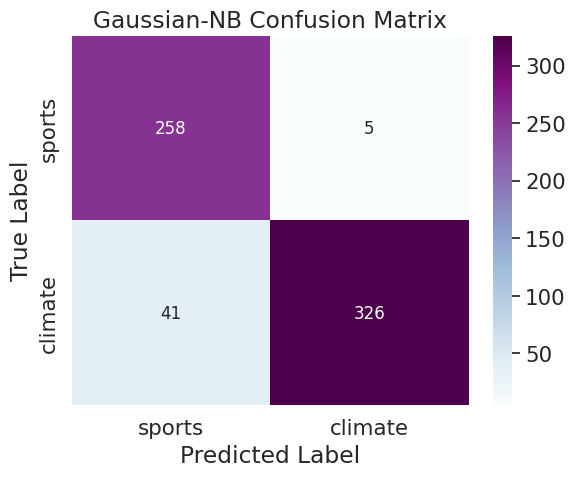

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

#Confusion matrix for GaussianNB

cm_gnb = confusion_matrix(binary_test, predicted)
labels=['sports', 'climate']

sn.set(font_scale=1.4)  # for label size
sn.heatmap(cm_gnb, annot=True, fmt='.0f',annot_kws={"size": 12}, xticklabels=labels, yticklabels=labels, cmap="BuPu")
plt.title('Gaussian-NB Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#Calculated accuracy, recall, precision and F-1 score of GaussianNB classifer on testing set

print('Accuracy score for the Gaussian-NB is {}'.format(accuracy_score(binary_test, predicted)))
print('Recall score for the Gaussian-NB is {}'.format(recall_score(binary_test,predicted)))
print('Precision score for the Gaussian-NB is {}'.format(precision_score(binary_test,predicted)))
print('F-1 score for the Gaussian-NB is {}'.format(f1_score(binary_test,predicted)))

Accuracy score for the Gaussian-NB is 0.926984126984127
Recall score for the Gaussian-NB is 0.888283378746594
Precision score for the Gaussian-NB is 0.9848942598187311
F-1 score for the Gaussian-NB is 0.9340974212034384


Question #8

In [ ]:
from nltk.tokenize.destructive import NLTKWordTokenizer
from nltk.translate.meteor_score import PorterStemmer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from nltk.stem.snowball import SnowballStemmer

from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from tempfile import mkdtemp
from shutil import rmtree

from joblib import Memory
import joblib

import time 


def lemma(doc):
    sent = lemmatize_sent(doc) 
    sent = [i for i in sent if not i.isdigit()] # remove numbers
    return sent

stemmer = PorterStemmer()

def stemmed(doc):
  return (stemmer.stem(word) for word in nltk.word_tokenize(doc) if not word.isdigit())

def noclean(doc):
  return doc 
  

analyzer = CountVectorizer().build_analyzer()

cachedir = mkdtemp()
memory = Memory(location = cachedir, verbose=10)
pipe = Pipeline(steps=[
    ('clean', FunctionTransformer(clean)),
    ('vect', CountVectorizer(min_df=3, analyzer=lemma, stop_words='english')),
    ("Dim_reduction",TruncatedSVD(n_components = 5, random_state=42)),
    ('classifier', LinearSVC(C=1)),  
], memory=memory)

params = {
    'clean': [FunctionTransformer(clean), FunctionTransformer(noclean)],
    'vect__min_df': [3,5],
    'vect__analyzer': [lemma, stemmed],
    'Dim_reduction': [TruncatedSVD(n_components = 5, random_state=42), TruncatedSVD(n_components = 30, random_state=42), TruncatedSVD(n_components = 80, random_state=42),
                          NMF(n_components=5, init='random', random_state=42), NMF(n_components=30, init='random', random_state=42), NMF(n_components=80, init='random', random_state=42)],
    'classifier': [LinearSVC(C=0.01, random_state=42), LogisticRegression(C=1, penalty='l1', random_state=42), LogisticRegression(C=0.1, penalty='l2',random_state=42), GaussianNB()],
}


search = GridSearchCV(pipe, params, scoring="accuracy", cv=5, n_jobs=1)

X_train = train['full_text']

search.fit(X_train, binary_train)

results = pd.DataFrame(search.cv_results_)
results.sort_values(by ='rank_test_score', inplace=True, ignore_index=True)

params_1st_best = results.loc[0, 'params']
params_2nd_best = results.loc[1, 'params']
params_3rd_best = results.loc[2, 'params']
params_4th_best = results.loc[3, 'params']
params_5th_best = results.loc[4, 'params']

clf_1st_best = search.best_estimator_.set_params(**params_1st_best)
clf_2nd_best = search.best_estimator_.set_params(**params_2nd_best)
clf_3rd_best = search.best_estimator_.set_params(**params_3rd_best)
clf_4th_best = search.best_estimator_.set_params(**params_4th_best)
clf_5th_best = search.best_estimator_.set_params(**params_5th_best)

print('The best combination has a mean test score of {}.\nIts combination is: {}'.format(results.loc[0, 'mean_test_score'],params_1st_best))
print('{}\n \n \n'.format(clf_1st_best))

print('The 2nd best combination has a mean test score of {}.\nIts combination is: {}'.format(results.loc[1, 'mean_test_score'],params_2nd_best))
print('{}\n \n \n'.format(clf_2nd_best))

print('The 3rd best combination has a mean test score of {}.\nIts combination is: {}'.format(results.loc[2, 'mean_test_score'],params_3rd_best))
print('{}\n \n \n'.format(clf_3rd_best))

print('The 4th best combination has a mean test score of {}.\nIts combination is: {}'.format(results.loc[3, 'mean_test_score'],params_4th_best))
print('{}\n \n \n'.format(clf_4th_best))

print('The 5th best combination has a mean test score of {}.\nIts combination is: {}'.format(results.loc[4, 'mean_test_score'],params_5th_best))
print('{}\n \n \n'.format(clf_5th_best))
rmtree(cachedir)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(FunctionTransformer(func=<function clean at 0x7f1449e1bf70>), 365     'KARACHI, Pakistan (AP)  Bad weather in Multan...
367     'Cricket fans can now be part an exciting inte...
369     'RAWALPINDI, Pakistan (AP)  England struck wit...
371     'The best cricket bats in the world are made i...
372     'Its where baseball gets its roots  the sport ...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at Verrado, an ,-acre p...
3148    'Jakarta, Dec (EFE).- Dozens of Rohingya refug...
3149    'By Nora Buli OSLO (Reuters)  Norways depleted...
Name: full_text, Length: 2016, dtype: object, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
_____________________________

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemma at 0x7f143a98d940>, min_df=3,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at Verrado, an ,-acre p...
3148    'Jakarta, Dec (EFE).- Dozens of Rohingya refug...
3149    'By Nora Buli OSLO (Reuters)  Norways depleted...
Name: full_text, Length: 2016, dtype: object, 
array([1, ..., 0]), None, message_clsname='Pipel

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(FunctionTransformer(func=<function noclean at 0x7f143a9281f0>), 1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at Verrado, an ,-acre p...
3148    'Jakarta, Dec (EFE).- Dozens of Rohingya refug...
3149    'By Nora Buli OSLO (Reuters)  Norways depleted...
Name: full_text, Length: 2016, dtype: object, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
___________________________

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemma at 0x7f143a98d940>, min_df=5,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at Verrado, an ,-acre p...
3148    'Jakarta, Dec (EFE).- Dozens of Rohingya refug...
3149    'By Nora Buli OSLO (Reuters)  Norways depleted...
Name: full_text, Length: 2016, dtype: object, 
array([1, ..., 0]), None, message_clsname='Pipel

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/85186ff3f6485c19827e21b89246efe6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemma at 0x7f143a98d940>, min_df=5,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
2865    ' Newshub Watch: NIWA and MPI release new drou...
2866    'While drought continues to improve throughout...
2867    'Close Get email notification

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 31.8s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=5, random_state=42), <2016x11848 sparse matrix of type '<class 'numpy.int64'>'
	with 448318 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.3s, 0.0min


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/c4face2e6c53d048ff8b5da0ec1cfd11
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemmed at 0x7f143b710550>, min_df=3,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at V

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 29.3s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=5, random_state=42), <2016x11213 sparse matrix of type '<class 'numpy.int64'>'
	with 420841 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.3s, 0.0min


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/06b5ebc77f514dc8142d8d38b9cae69a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemmed at 0x7f143b710550>, min_df=3,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at V

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 34.7s, 0.6min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=5, random_state=42), <2016x11846 sparse matrix of type '<class 'numpy.int64'>'
	with 447593 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.3s, 0.0min


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/e34825e707736c9833e6232535aacc3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemmed at 0x7f143b710550>, min_df=3,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at V

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 33.1s, 0.6min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=5, random_state=42), <2016x11277 sparse matrix of type '<class 'numpy.int64'>'
	with 437920 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.3s, 0.0min


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/85186ff3f6485c19827e21b89246efe6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemmed at 0x7f143b710550>, min_df=3,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
2865    ' Newshub Watch: NIWA and MPI release new drou...
2866    'While drought continues to improve throughout...
2867    'Close Get email notificati

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 34.2s, 0.6min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=5, random_state=42), <2016x11865 sparse matrix of type '<class 'numpy.int64'>'
	with 454280 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.3s, 0.0min


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/2316c72bcc89bdd120bba67dd73e04cc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemmed at 0x7f143b710550>, min_df=5,
                stop_words='english'), 
365     'KARACHI, Pakistan (AP)  Bad weather in Multan...
367     'Cricket fans can now be part an exciting inte...
369     'RAWALPINDI, Pakistan (AP)  England struck wit...
371     'The best cricket bats in the world are made i...
372     'Its where baseball gets its roots  the sport ...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at V

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 31.7s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=5, random_state=42), <2016x8221 sparse matrix of type '<class 'numpy.int64'>'
	with 436120 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.3s, 0.0min


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/c4face2e6c53d048ff8b5da0ec1cfd11
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemmed at 0x7f143b710550>, min_df=5,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at V

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 29.2s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=5, random_state=42), <2016x7801 sparse matrix of type '<class 'numpy.int64'>'
	with 409383 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.2s, 0.0min


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/06b5ebc77f514dc8142d8d38b9cae69a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemmed at 0x7f143b710550>, min_df=5,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at V

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 34.5s, 0.6min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=5, random_state=42), <2016x7867 sparse matrix of type '<class 'numpy.int64'>'
	with 434271 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.2s, 0.0min


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/e34825e707736c9833e6232535aacc3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemmed at 0x7f143b710550>, min_df=5,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at V

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 31.0s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=5, random_state=42), <2016x7635 sparse matrix of type '<class 'numpy.int64'>'
	with 425729 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.3s, 0.0min


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/85186ff3f6485c19827e21b89246efe6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemmed at 0x7f143b710550>, min_df=5,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
2865    ' Newshub Watch: NIWA and MPI release new drou...
2866    'While drought continues to improve throughout...
2867    'Close Get email notificati

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 34.4s, 0.6min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=5, random_state=42), <2016x8225 sparse matrix of type '<class 'numpy.int64'>'
	with 442036 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.2s, 0.0min


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(FunctionTransformer(func=<function clean at 0x7f1449e1bf70>), 365     'KARACHI, Pakistan (AP)  Bad weather in Multan...
367     'Cricket fans can now be part an exciting inte...
369     'RAWALPINDI, Pakistan (AP)  England struck wit...
371     'The best cricket bats in the world are made i...
372     'Its where baseball gets its roots  the sport ...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at Verrado, an ,-acre p...
3148    'Jakarta, Dec (EFE).- Dozens of Rohingya refug...
3149    'By Nora Buli OSLO (Reuters)  Norways depleted...
Name: full_text, Length: 2016, dtype: object, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
_____________________________

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/e34825e707736c9833e6232535aacc3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemma at 0x7f143a98d940>, min_df=3,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at Ver

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemma at 0x7f143a98d940>, min_df=5,
                stop_words='english'), 
365     'KARACHI, Pakistan (AP)  Bad weather in Multan...
367     'Cricket fans can now be part an exciting inte...
369     'RAWALPINDI, Pakistan (AP)  England struck wit...
371     'The best cricket bats in the world are made i...
372     'Its where baseball gets its roots  the sport ...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at Verrado, an ,-acre p...
3148    'Jakarta, Dec (EFE).- Dozens of Rohingya refug...
3149    'By Nora Buli OSLO (Reuters)  Norways depleted...
Name: full_tex

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemma at 0x7f143a98d940>, min_df=5,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at Verrado, an ,-acre p...
3148    'Jakarta, Dec (EFE).- Dozens of Rohingya refug...
3149    'By Nora Buli OSLO (Reuters)  Norways depleted...
Name: full_text, Length: 2016, dtype: object, 
array([1, ..., 0]), None, message_clsname='Pipel

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/2316c72bcc89bdd120bba67dd73e04cc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/904bfe0b750f91868971cafc49784e64
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/1241f06a010216ec6e136c6abf4506cb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/c4face2e6c53d048ff8b5da0ec1cfd11
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pll

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemma at 0x7f143a98d940>, min_df=3,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at Verrado, an ,-acre p...
3148    'Jakarta, Dec (EFE).- Dozens of Rohingya refug...
3149    'By Nora Buli OSLO (Reuters)  Norways depleted...
Name: full_text, Length: 2016, dtype: object, 
array([1, ..., 0]), None, message_clsname='Pipel

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemma at 0x7f143a98d940>, min_df=3,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
2865    ' Newshub Watch: NIWA and MPI release new drou...
2866    'While drought continues to improve throughout...
2867    'Close Get email notifications on {{subject}} ...
2868    'HK University Study Finds Older Trees Are Mor...
2869    'A tiny fish dwelling in the waters of New Mex...
Name: full_text, Length: 2016, dtype: object, 
array([1, ..., 0]), None, message_clsname='Pipel

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemma at 0x7f143a98d940>, min_df=5,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at Verrado, an ,-acre p...
3148    'Jakarta, Dec (EFE).- Dozens of Rohingya refug...
3149    'By Nora Buli OSLO (Reuters)  Norways depleted...
Name: full_text, Length: 2016, dtype: object, 
array([1, ..., 0]), None, message_clsname='Pipel

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemma at 0x7f143a98d940>, min_df=5,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at Verrado, an ,-acre p...
3148    'Jakarta, Dec (EFE).- Dozens of Rohingya refug...
3149    'By Nora Buli OSLO (Reuters)  Norways depleted...
Name: full_text, Length: 2016, dtype: object, 
array([1, ..., 0]), None, message_clsname='Pipel

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/1241f06a010216ec6e136c6abf4506cb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/c4face2e6c53d048ff8b5da0ec1cfd11
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/6b29f8d61eb57f929c84af943b64de4f
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/d5e9fc7adf10baa8a0d27027d2150926
___________________________________fit_transform_one cache loaded - 0.0s

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemma at 0x7f143a98d940>, min_df=3,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at Verrado, an ,-acre p...
3148    'Jakarta, Dec (EFE).- Dozens of Rohingya refug...
3149    'By Nora Buli OSLO (Reuters)  Norways depleted...
Name: full_text, Length: 2016, dtype: object, 
array([1, ..., 0]), None, message_clsname='Pipel

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/2316c72bcc89bdd120bba67dd73e04cc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemma at 0x7f143a98d940>, min_df=5,
                stop_words='english'), 
365     'KARACHI, Pakistan (AP)  Bad weather in Multan...
367     'Cricket fans can now be part an exciting inte...
369     'RAWALPINDI, Pakistan (AP)  England struck wit...
371     'The best cricket bats in the world are made i...
372     'Its where baseball gets its roots  the sport ...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at Ver

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemma at 0x7f143a98d940>, min_df=5,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at Verrado, an ,-acre p...
3148    'Jakarta, Dec (EFE).- Dozens of Rohingya refug...
3149    'By Nora Buli OSLO (Reuters)  Norways depleted...
Name: full_tex

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/c4face2e6c53d048ff8b5da0ec1cfd11
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/6b29f8d61eb57f929c84af943b64de4f
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/d5e9fc7adf10baa8a0d27027d2150926
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/06b5ebc77f514dc8142d8d38b9cae69a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pll

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemma at 0x7f143a98d940>, min_df=3,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at Verrado, an ,-acre p...
3148    'Jakarta, Dec (EFE).- Dozens of Rohingya refug...
3149    'By Nora Buli OSLO (Reuters)  Norways depleted...
Name: full_text, Length: 2016, dtype: object, 
array([1, ..., 0]), None, message_clsname='Pipel

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemma at 0x7f143a98d940>, min_df=3,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
2865    ' Newshub Watch: NIWA and MPI release new drou...
2866    'While drought continues to improve throughout...
2867    'Close Get email notifications on {{subject}} ...
2868    'HK University Study Finds Older Trees Are Mor...
2869    'A tiny fish dwelling in the waters of New Mex...
Name: full_text, Length: 2016, dtype: object, 
array([1, ..., 0]), None, message_clsname='Pipel

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/06b5ebc77f514dc8142d8d38b9cae69a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemma at 0x7f143a98d940>, min_df=5,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
3144    'The Mandrare river, now a dried up river bed,...
3145    'By Rachel Premack of FreightWaves You probabl...
3147    'A golf cart on a path at Ver

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemma at 0x7f143a98d940>, min_df=5,
                stop_words='english'), 
1       'HKO Hockey Canada Sponsorship Hockey Canada h...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
5       'Referee Martin Pronovost wears a Hockey Canad...
                              ...                        
2865    ' Newshub Watch: NIWA and MPI release new drou...
2866    'While drought continues to improve throughout...
2867    'Close Get email notifications on {{subject}} ...
2868    'HK University Study Finds Older Trees Are Mor...
2869    'A tiny fish dwelling in the waters of New Mex...
Name: full_tex

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/c4face2e6c53d048ff8b5da0ec1cfd11
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/6b29f8d61eb57f929c84af943b64de4f
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=30, random_state=42), <2016x11213 sparse matrix of type '<class 'numpy.int64'>'
	with 420841 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.6s, 0.0min


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/06b5ebc77f514dc8142d8d38b9cae69a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/4a41d338870c9cc5d0464f75b5352d98
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=30, random_state=42), <2016x11846 sparse matrix of type '<class 'numpy.int64'>'
	with 447593 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.7s, 0.0min


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/e34825e707736c9833e6232535aacc3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/66b2bf7377be34f1182ad09b49c4a0f4
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=30, random_state=42), <2016x11277 sparse matrix of type '<class 'numpy.int64'>'
	with 437920 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.6s, 0.0min


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/85186ff3f6485c19827e21b89246efe6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/8b3f6de05126e37cbe76bec52548a379
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=30, random_state=42), <2016x11865 sparse matrix of type '<class 'numpy.int64'>'
	with 454280 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.6s, 0.0min


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/2316c72bcc89bdd120bba67dd73e04cc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/9a46d6bf2e544344a2958f6433942c4a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=30, random_state=42), <2016x8221 sparse matrix of type '<class 'numpy.int64'>'
	with 436120 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.6s, 0.0min


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/c4face2e6c53d048ff8b5da0ec1cfd11
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmprw8pllor/joblib/sklearn/pipeline/_fit_transform_one/6c80c0fe043596f5de4673f0663bb1e0
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=30, random_state=42), <2016x7801 sparse matrix of type '<class 'numpy.int64'>'
	with 409383 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.6s, 0.0min


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KeyboardInterrupt: ignored

Question #9


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
np.random.seed(42)
random.seed(42) 
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize, pos_tag
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from nltk.corpus import wordnet as wn
import nltk



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import pickle
from collections import Counter, defaultdict
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score # recall scorer
from sklearn.metrics import precision_score # precision scorer
from sklearn.metrics import roc_curve # ROC curve
from sklearn.metrics import f1_score # f1
import itertools


# SVM for multi-class classification using one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

# logistic regression for multi-class classification using a one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

import os
import gensim
from gensim.scripts.glove2word2vec import glove2word2vec 
from gensim.models import KeyedVectors
from scipy import spatial

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
 import nltk
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
path ="/content/drive/MyDrive/EC ENGR 219 Data Minning /Project1-Classification.csv"

df = pd.read_csv(path)

In [ ]:
df.shape # 3150 rows(samples) & 8 Columns (Features)

print('Number of data points : ', df.shape[0])
print('Number of features : ', df.shape[1])
df.head()

Number of data points :  3150
Number of features :  8


,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,"'Pure Hockey, the largest hockey retailer in t...","'Pure Hockey, the largest hockey retailer in t...","['acquire', 'agrees', 'nevada', 'retail', 'hoc...",2022-10-21 17:11:22+00:00,['Ein News'],https://www.einnews.com/pr_news/597148062/pure...,hockey,sports
1,'HKO Hockey Canada Sponsorship 20221006\n\nHoc...,'The tally of Hockey Canada’s sponsorship loss...,"['sexual', 'exclusive', 'settlement', 'million...",NaN,['Barbara Shecter'],https://ca.finance.yahoo.com/news/exclusive-ho...,hockey,sports
2,'Canadian Prime Minister Justin Trudeau said W...,'Canadian Prime Minister Justin Trudeau said W...,"['québec', 'surprise', 'trust', 'sexual', 'org...",2022-10-05 00:00:00,['The Athletic Staff'],https://theathletic.com/3659888/2022/10/05/hoc...,hockey,sports
3,'Hockey Canada paid a crisis communications fi...,'Nicholson says that Hockey Canada did not go ...,"['sexual', 'organization', 'million', 'ceo', '...",2022-11-15 00:00:00,['Dan Robson'],https://theathletic.com/3900630/2022/11/15/hoc...,hockey,sports
4,'The Denver Broncos are looking for a new head...,'The Denver Broncos are looking for a new head...,"['beats', 'force', 'season', 'teams', 'anchora...",NaN,"['Parker Seibold', 'The Gazette', 'Gazette File']",https://gazette.com/multimedia/photo-air-force...,hockey,sports


In [ ]:
train, test = train_test_split(df[["full_text","root_label","leaf_label"]], test_size=0.2)
print("Training Samples",len(train))
print("Testing Samples",len(test))

Training Samples 2520
Testing Samples 630


In [ ]:
df['leaf_label']

0        hockey
1        hockey
2        hockey
3        hockey
4        hockey
         ...   
3145    drought
3146    drought
3147    drought
3148    drought
3149    drought
Name: leaf_label, Length: 3150, dtype: object

In [ ]:
#map_row_to_class = {0:"chess", 1:"cricket", 2:"hockey", 3:"soccer",4:"football", 5:"%22forest%20fire%22", 6:"flood", 7:"earthquake",8:"drought"}

train_label=train['leaf_label'].copy()
test_label=test['leaf_label'].copy()

train_label[train_label=='chess']=0
test_label[test_label=='chess']=0


train_label[train_label=='cricket']=1
test_label[test_label=='cricket']=1

train_label[train_label=='hockey']=2
test_label[test_label=='hockey']=2


train_label[train_label=='soccer']=3
test_label[test_label=='soccer']=3


train_label[train_label=='football']=4
test_label[test_label=='football']=4

train_label[train_label=='%22forest%20fire%22']=5
test_label[test_label=='%22forest%20fire%22']=5

train_label[train_label=='flood']=6
test_label[test_label=='flood']=6

train_label[train_label=='earthquake']=7
test_label[test_label=='earthquake']=7

train_label[train_label=='drought']=8
test_label[test_label=='drought']=8

train_label[0:20]
print("Training Set\n")
print("Original train_dataset:\n" + str(train["leaf_label"][0:20]))
print("\n mapped train_dataset:\n" + str(train_label[0:20]))
print("\nTest Set\n")
print("Original test_dataset:\n" + str(test["leaf_label"][0:20]))
print("\n mapped test_dataset:\n" + str(test_label[0:20]))

Training Set

Original train_dataset:
2310                  flood
2189                  flood
2304                  flood
2988                drought
221                  hockey
543                 cricket
1423                  chess
2258                  flood
705                football
2465             earthquake
1006               football
1793    %22forest%20fire%22
2781             earthquake
2929                drought
978                football
1904    %22forest%20fire%22
1798    %22forest%20fire%22
272                  hockey
521                 cricket
522                 cricket
Name: leaf_label, dtype: object

 mapped train_dataset:
2310    6
2189    6
2304    6
2988    8
221     2
543     1
1423    0
2258    6
705     4
2465    7
1006    4
1793    5
2781    7
2929    8
978     4
1904    5
1798    5
272     2
521     1
522     1
Name: leaf_label, dtype: object

Test Set

Original test_dataset:
2965       drought
969       football
1385        soccer
1233        soccer
2996

In [ ]:
train['encoded'] = train_label.astype(str).astype(int)

In [ ]:
test['encoded'] = test_label.astype(str).astype(int)

In [ ]:
train = train.sort_values(by = 'encoded')

In [ ]:
test = test.sort_values(by = 'encoded')

In [ ]:
import re
def clean(text):
    text = re.sub(r"http\S+", '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    texter = re.sub(r"[0-9]","", texter)
    texter = re.sub('[^a-zA-Z0-9\n]', ' ', texter)
    texter = re.sub('\s+',' ', texter)
    texter = texter.lower()
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

In [ ]:
train['full_text'] = train['full_text'].apply(clean)
test['full_text'] = test['full_text'].apply(clean)

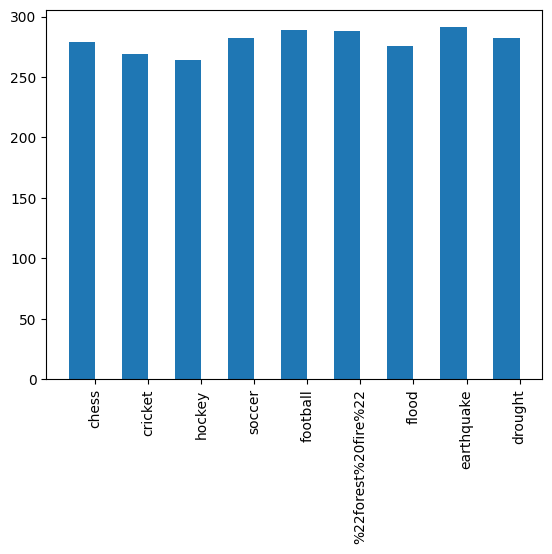

In [ ]:
counter = Counter(train['leaf_label'])
leaf_names = counter.keys()
leaf_counts = counter.values()

# Plot histogram using matplotlib bar().
indexes = np.arange(len(leaf_names))
plt.bar(indexes, leaf_counts, 0.5)
plt.xticks(indexes + 0.5 * 0.5, leaf_names, rotation=90)
plt.show()

In [ ]:
print("Number of distributions per leaf label in Train : ",leaf_counts)

Number of distributions per leaf label in Train :  dict_values([279, 269, 264, 282, 289, 288, 276, 291, 282])


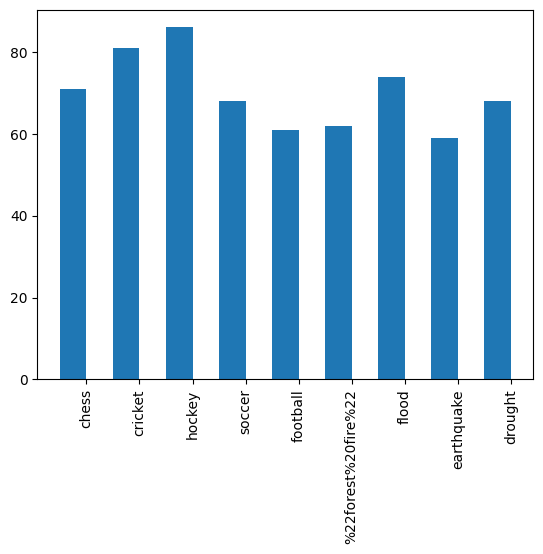

In [ ]:
counter = Counter(test['leaf_label'])
leaf_names = counter.keys()
leaf_counts = counter.values()

# Plot histogram using matplotlib bar().
indexes = np.arange(len(leaf_names))
plt.bar(indexes, leaf_counts, 0.5)
plt.xticks(indexes + 0.5 * 0.5, leaf_names, rotation=90)
plt.show()

In [ ]:
print("Number of distributions per leaf label in test: ", leaf_counts)

Number of distributions per leaf label in test:  dict_values([71, 81, 86, 68, 61, 62, 74, 59, 68])


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk import pos_tag
from pickle import dump

counts = []

wnl = nltk.wordnet.WordNetLemmatizer()
analyzer = CountVectorizer().build_analyzer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]


def rmv_nums(doc):
    #gets rid of numbers including floats
    #does lemmatization with nltk.wordnet.WordNetLemmatizer and pos_tag
    return (word for word in lemmatize_sent(analyzer(doc)) 
            if not word.isdigit())

#CountVectorizer returns a callable that handles preprocessing and tokenization
#Use the “english” stopwords of the CountVectorizer
vectorizer=CountVectorizer(analyzer=rmv_nums,min_df=5,stop_words='english')

#do feature extraction (train):
X_train_count=vectorizer.fit_transform(train["full_text"]) #get matrix of doc-term counts (training data)
print('Size of training data after lemmatization but before TF-IDF: ', X_train_count.shape) 
X_test_count=vectorizer.transform(test["full_text"]) 
print('Size of testing data after lemmatization but before TF-IDF:  ', X_test_count.shape) 

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)
print('Shape of train TF-IDF matrix: ',X_train_tfidf.shape)
X_test_tfidf = tfidf_transformer.transform(X_test_count)
print('Shape of test TF-IDF matrix:  ',X_test_tfidf.shape)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


Size of training data after lemmatization but before TF-IDF:  (2520, 9660)
Size of testing data after lemmatization but before TF-IDF:   (630, 9660)
Shape of train TF-IDF matrix:  (2520, 9660)
Shape of test TF-IDF matrix:   (630, 9660)


In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=42, n_iter = 10)
X_train_LSI = svd.fit_transform(X_train_tfidf)
X_test_LSI = svd.transform(X_test_tfidf)
print('LSI train:')
print(X_train_LSI.shape)
print('LSI test:')
print(X_test_LSI.shape)

LSI train:
(2520, 50)
LSI test:
(630, 50)


In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=50, init = 'random', random_state=42, max_iter=1000)
X_train_NMF = nmf.fit_transform(X_train_tfidf)
X_test_NMF = nmf.transform(X_test_tfidf)
print('NMF train:')
print(X_train_NMF.shape)
print('NMF test:')
print(X_test_NMF.shape)

NMF train:
(2520, 50)
NMF test:
(630, 50)


In [ ]:
X_mult_train = [X_train_tfidf.toarray(), X_train_LSI, X_train_NMF]
y_mult_train = train["leaf_label"]
X_mult_test = [X_test_tfidf.toarray(), X_test_LSI, X_test_NMF]
y_mult_test = test["leaf_label"]

In [ ]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          classes = []
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Naive Bayes
multiclass_NB = GaussianNB()
classes = ['chess', "cricket", "soccer","football","%22forest%20fire%22","flood","earthquake",'drought']
labels = ['TFIDF', 'LSI', 'NMF'] # LSI, NMF
for idx, x in enumerate(X_mult_train):
    if (idx < len(labels)):
            # train model
        multiclass_NB.fit(x, y_mult_train)
            # get test results
        multiclass_NB_pred = multiclass_NB.predict(X_mult_test[idx])
        multiclass_NB_confusion = confusion_matrix(y_true=y_mult_test, y_pred=multiclass_NB_pred)
        multiclass_NB_accuracy = accuracy_score(y_true=y_mult_test, y_pred=multiclass_NB_pred)
        multiclass_NB_recall = recall_score(y_true=y_mult_test, y_pred=multiclass_NB_pred, average='micro')
        multiclass_NB_precision = precision_score(y_true=y_mult_test, y_pred=multiclass_NB_pred, average='micro')
        multiclass_NB_f1 = f1_score(y_true=y_mult_test, y_pred=multiclass_NB_pred, average='micro')
        print("Multiclass NaiveBayes " + str(labels[idx]) + " Confusion matrix: \n")
        plt.figure(idx)
        plot_confusion_matrix(multiclass_NB_confusion, classes = classes)
        print("Multiclass NaiveBayes " + str(labels[idx]) + " Accuracy Score: " + str(multiclass_NB_accuracy))
        print("Multiclass NaiveBayes " + str(labels[idx]) + " Recall Score: " + str(multiclass_NB_recall))
        print("Multiclass NaiveBayes " + str(labels[idx]) + " Precision Score: " + str(multiclass_NB_precision))
        print("Multiclass NaiveBayes " + str(labels[idx]) + " f1 Score: " + str(multiclass_NB_f1))

In [ ]:
# Multiclass SVM classification
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
multiclass_svm_OvO = OneVsOneClassifier(SVC(random_state=42))
multiclass_svm_OvR = OneVsRestClassifier(SVC(random_state=42))

Multiclass SVM OvO TFIDF Confusion matrix: 

Confusion matrix, without normalization
[[47  2  0  1  0  1  0  1  0]
 [ 5 63  0  1  0  0  0  0  0]
 [ 0  0 60  1  0  0  2  0  0]
 [ 5  1  1 75  0  1  0  0  0]
 [ 3  2  0  1 58  0  0  0  0]
 [ 3  0  0  3  0 62  1  0  0]
 [ 1  0  0  0  0  0 24  1 40]
 [ 8  0  0  0  0  0  0 71  1]
 [ 1  0  0  0  0  1 69  1 12]]


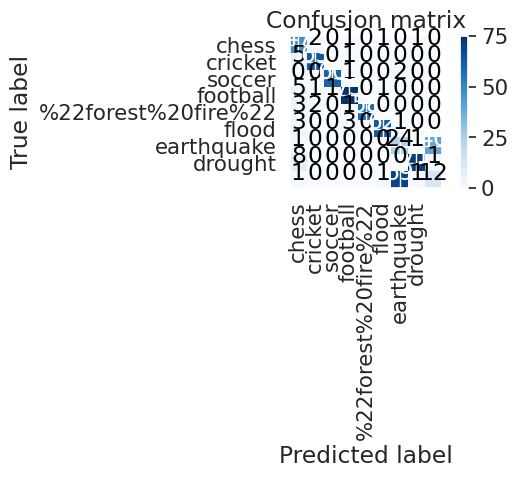

Multiclass SVM OvO TFIDF Accuracy Score: 0.7492063492063492
Multiclass SVM OvO TFIDF Recall Score: 0.7492063492063492
Multiclass SVM OvO TFIDF Precision Score: 0.7492063492063492
Multiclass SVM OvO TFIDF f1 Score: 0.7492063492063492
Multiclass SVM OvO LSI Confusion matrix: 

Confusion matrix, without normalization
[[45  2  1  2  1  1  0  0  0]
 [ 7 61  0  1  0  0  0  0  0]
 [ 1  0 60  0  0  0  2  0  0]
 [ 6  0  1 73  0  3  0  0  0]
 [ 3  2  1  2 56  0  0  0  0]
 [ 2  0  1  3  2 60  1  0  0]
 [ 3  0  1  0  0  0 42  0 20]
 [ 7  1  0  0  1  0  0 70  1]
 [ 3  0  0  0  0  1 54  0 26]]


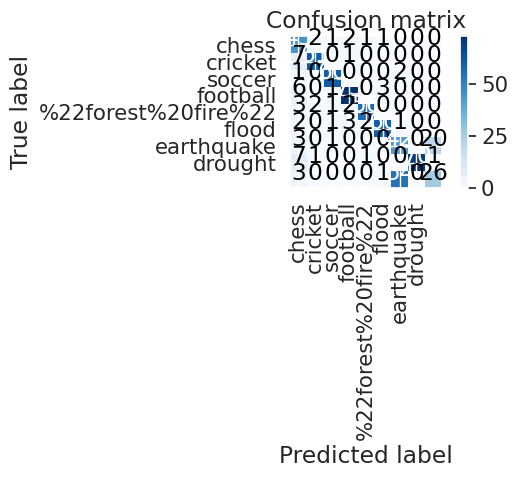

Multiclass SVM OvO LSI Accuracy Score: 0.7825396825396825
Multiclass SVM OvO LSI Recall Score: 0.7825396825396825
Multiclass SVM OvO LSI Precision Score: 0.7825396825396825
Multiclass SVM OvO LSI f1 Score: 0.7825396825396826
Multiclass SVM OvO NMF Confusion matrix: 

Confusion matrix, without normalization
[[44  6  0  1  0  1  0  0  0]
 [ 4 64  0  1  0  0  0  0  0]
 [ 0  2 58  0  1  0  1  0  1]
 [ 6  2  0 71  0  4  0  0  0]
 [ 2  7  0  1 53  1  0  0  0]
 [ 3  2  0  4  1 59  0  0  0]
 [ 2  0  1  0  0  0 43  3 17]
 [ 6  2  0  0  1  0  0 68  3]
 [ 1  1  1  0  0  1 65  1 14]]


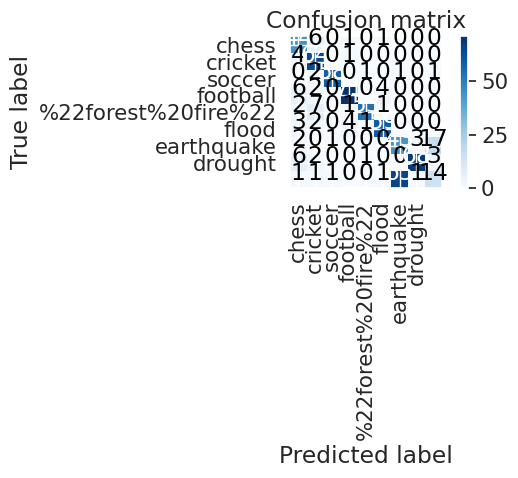

Multiclass SVM OvO NMF Accuracy Score: 0.7523809523809524
Multiclass SVM OvO NMF Recall Score: 0.7523809523809524
Multiclass SVM OvO NMF Precision Score: 0.7523809523809524
Multiclass SVM OvO NMF f1 Score: 0.7523809523809524


In [ ]:
labels = ['TFIDF', 'LSI', 'NMF'] #, 'LSI', 'NMF'
classes = ['chess', "cricket", "soccer","football","%22forest%20fire%22","flood","earthquake",'drought']
for idx, x in enumerate(X_mult_train):
    if (idx < len(labels)):
        # train model
        multiclass_svm_OvO.fit(x, y_mult_train)
        # get test results
        multiclass_svm_OvO_pred = multiclass_svm_OvO.predict(X_mult_test[idx])
        multiclass_svm_OvO_confusion = confusion_matrix(y_true=y_mult_test, y_pred=multiclass_svm_OvO_pred)
        multiclass_svm_OvO_accuracy = accuracy_score(y_true=y_mult_test, y_pred=multiclass_svm_OvO_pred)
        multiclass_svm_OvO_recall = recall_score(y_true=y_mult_test, y_pred=multiclass_svm_OvO_pred, average='micro')
        multiclass_svm_OvO_precision = precision_score(y_true=y_mult_test, y_pred=multiclass_svm_OvO_pred, average='micro')
        multiclass_svm_OvO_f1 = f1_score(y_true=y_mult_test, y_pred=multiclass_svm_OvO_pred, average='micro')
        print("Multiclass SVM OvO " + str(labels[idx]) + " Confusion matrix: \n")
        plt.figure(idx)
        plot_confusion_matrix(multiclass_svm_OvO_confusion, classes = classes)
        print("Multiclass SVM OvO " + str(labels[idx]) + " Accuracy Score: " + str(multiclass_svm_OvO_accuracy))
        print("Multiclass SVM OvO " + str(labels[idx]) + " Recall Score: " + str(multiclass_svm_OvO_recall))
        print("Multiclass SVM OvO " + str(labels[idx]) + " Precision Score: " + str(multiclass_svm_OvO_precision))
        print("Multiclass SVM OvO " + str(labels[idx]) + " f1 Score: " + str(multiclass_svm_OvO_f1))

In [ ]:
labels = ['TFIDF', 'LSI', 'NMF'] # , 'LSI', 'NMF'
classes = ['chess', "cricket", "soccer","football","%22forest%20fire%22","flood","earthquake",'drought']
for idx, x in enumerate(X_mult_train):
    if (idx < len(labels)):
        # train model
        multiclass_svm_OvR.fit(x, y_mult_train)
        # get test results
        multiclass_svm_OvR_pred = multiclass_svm_OvR.predict(X_mult_test[idx])
        multiclass_svm_OvR_confusion = confusion_matrix(y_true=y_mult_test, y_pred=multiclass_svm_OvR_pred)
        multiclass_svm_OvR_accuracy = accuracy_score(y_true=y_mult_test, y_pred=multiclass_svm_OvR_pred)
        multiclass_svm_OvR_recall = recall_score(y_true=y_mult_test, y_pred=multiclass_svm_OvR_pred, average='micro')
        multiclass_svm_OvR_precision = precision_score(y_true=y_mult_test, y_pred=multiclass_svm_OvR_pred, average='micro')
        multiclass_svm_OvR_f1 = f1_score(y_true=y_mult_test, y_pred=multiclass_svm_OvR_pred, average='micro')
        print("Multiclass SVM OvR " + str(labels[idx]) + " Confusion matrix: \n")
        plt.figure(idx)
        plot_confusion_matrix(multiclass_svm_OvR_confusion, classes = classes)
        print("Multiclass SVM OvR " + str(labels[idx]) + " Accuracy Score: " + str(multiclass_svm_OvR_accuracy))
        print("Multiclass SVM OvR " + str(labels[idx]) + " Recall Score: " + str(multiclass_svm_OvR_recall))
        print("Multiclass SVM OvR " + str(labels[idx]) + " Precision Score: " + str(multiclass_svm_OvR_precision))
        print("Multiclass SVM OvR " + str(labels[idx]) + " f1 Score: " + str(multiclass_svm_OvR_f1))

## **Question 10**

In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=898dccae8af3abed82066750c9454b5746ac58ab988f1342c4f5f5698f3feac1
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.9-py3-none-any.whl size=55620 sha256=03743a6c428d10313a2b5f50f690de92667e682eaa70de845608fbcef0379e70
  Stored in directory: /root/.cache/pip/wheels/eb/f2/e3/b8e73d1488d8284d88c9283411561b65bd4f0200abf131a946
Successfully built umap-learn pynndescent


In [ ]:
pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59436 sha256=c75438d649c16f6834ad372c13f75f1661668f8e2fd2316e631329b42cba0e43
  Stored in directory: /root/.cache/pip/wheels/42/ef/d7/781cf80d4146d76b3d2ed2510113d78c2643c842cc6c22918d
Successfully built datashape


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-04-19 23:52:59--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-04-19 23:52:59--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-04-19 23:53:00--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


## **Word Emedding**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import pickle
from collections import Counter, defaultdict
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score # recall scorer
from sklearn.metrics import precision_score # precision scorer
from sklearn.metrics import roc_curve # ROC curve
from sklearn.metrics import f1_score # f1

from sklearn import *
from sklearn.svm import SVC, LinearSVC
import itertools

import os
import gensim
from gensim.scripts.glove2word2vec import glove2word2vec 
from gensim.models import KeyedVectors
from scipy import spatial

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import TruncatedSVD, NMF

import umap
import umap.plot

# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
import joblib
from joblib import Memory

In [ ]:
embeddings_dict = {}
dimension_of_glove = 300
with open("glove.6B.300d.txt", 'r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict[word] = vector

In [ ]:
print(np.linalg.norm(embeddings_dict['queen']-embeddings_dict['king']-embeddings_dict['wife']+embeddings_dict['husband']))
print(np.linalg.norm(embeddings_dict['queen']-embeddings_dict['king']))
print(np.linalg.norm(embeddings_dict['wife']-embeddings_dict['husband']))

6.1650367
5.966258
3.1520464


In [ ]:
def find_similar_word(emmbedes):
  nearest = sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], emmbedes))
  return nearest

find_similar_word(embeddings_dict["queen"] - embeddings_dict["king"] + embeddings_dict["husband"])[:5]

['husband', 'wife', 'mother', 'daughter', 'grandmother']

In [ ]:
find_similar_word(embeddings_dict['river'])[0:10]

['river',
 'rivers',
 'tributary',
 'confluence',
 'valley',
 'flows',
 'along',
 'creek',
 'estuary',
 'tributaries']

In [ ]:
find_similar_word(embeddings_dict['king'] + embeddings_dict['queen'] + embeddings_dict['prince'])[0:10]

['king',
 'prince',
 'queen',
 'princess',
 'throne',
 'monarch',
 'crown',
 'royal',
 'ii',
 'duke']

In [ ]:
root_folder='.'
glove_folder_name=''
glove_filename='glove.6B.300d.txt'
glove_path = os.path.abspath(os.path.join(root_folder, glove_folder_name, glove_filename))
word2vec_output_file = glove_filename+'.word2vec'
glove2word2vec(glove_path, word2vec_output_file)
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

<ipython-input-115-29681aa1de91>:6: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_path, word2vec_output_file)


In [ ]:
model = KeyedVectors.load_word2vec_format(word2vec_output_file,binary=False)

In [ ]:
train, test = train_test_split(dataset[["full_text","root_label"]], test_size=0.2)

In [ ]:
print('Number of data points in train data:', train.shape[0])
print('Number of data points in test data:', test.shape[0])

Number of data points in train data: 2520
Number of data points in test data: 630


In [ ]:
X_train = train['full_text'].apply(clean)

In [ ]:
X_test = test['full_text'].apply(clean)

In [ ]:
X_train.head()


2301     temperatures will gradually start to warm up ...
526      by pawan atri min read veteran batter dinesh ...
358      australia s pat cummins third right celebrate...
542      culture after a historic win against pakistan...
2359     program support has also come in the form of ...
Name: full_text, dtype: object

In [ ]:
y_train_encoded = train["root_label"].copy()
y_test_encoded = test["root_label"].copy()

y_train_encoded[y_train_encoded == 'sports'] = 0
y_test_encoded[y_test_encoded == 'sports'] = 0


y_train_encoded[y_train_encoded== 'climate'] = 1
y_test_encoded[y_test_encoded == 'climate'] = 1

print("Training Set\n")
print("Original train_dataset:\n" + str(train["root_label"][0:20]))
print("\nBinarized train_dataset:\n" + str(y_train_encoded[0:20]))
print("\nTest Set\n")
print("Original test_dataset:\n" + str(test["root_label"][0:20]))
print("\nBinarized test_dataset:\n" + str(y_test_encoded[0:20]))

Training Set

Original train_dataset:
2301    climate
526      sports
358      sports
542      sports
2359    climate
2920    climate
685      sports
2922    climate
352      sports
937      sports
1885    climate
1100     sports
2771    climate
2642    climate
440      sports
1342     sports
451      sports
2273    climate
34       sports
3011    climate
Name: root_label, dtype: object

Binarized train_dataset:
2301    1
526     0
358     0
542     0
2359    1
2920    1
685     0
2922    1
352     0
937     0
1885    1
1100    0
2771    1
2642    1
440     0
1342    0
451     0
2273    1
34      0
3011    1
Name: root_label, dtype: object

Test Set

Original test_dataset:
369      sports
2712    climate
405      sports
2764    climate
2111    climate
3087    climate
2746    climate
1976    climate
1474     sports
2526    climate
293      sports
1919    climate
1803    climate
2332    climate
2843    climate
518      sports
2213    climate
975      sports
765      sports
1018     sport

In [ ]:
class Word2VecVectorizer:
    def __init__(self, model):
        print("Loading in word vectors...")
        self.word_vectors = model
        print("Finished loading in word vectors")
    
    def fit(self, data):
        pass
    
    def transform(self, data):
        v = self.word_vectors.get_vector('king')
        self.D = v.shape[0]

        X = np.zeros((len(data), self.D))
        n = 0
        emptycount = 0
        for sentence in data:
            tokens = sentence.split()
            vecs = []
            m = 0
            for word in tokens:
                try:
                    vec = self.word_vectors.get_vector(word)
                    vecs.append(vec)
                    m += 1
                except KeyError:
                    pass
            if len(vecs) > 0:
                vecs = np.array(vecs)
                X[n] = vecs.mean(axis=0)
            else:
                emptycount += 1
            n += 1
        print("Number of samples with no words found: %s / %s" % (emptycount, len(data)))
        return X

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

In [ ]:
vectorizer = Word2VecVectorizer(model)

Loading in word vectors...
Finished loading in word vectors


In [ ]:
X_train_fit = vectorizer.fit_transform(X_train)
y_train = y_train_encoded.astype(str).astype(int)
X_test_fit = vectorizer.transform(X_test)
y_test = y_test_encoded.astype(str).astype(int)
print(X_train_fit.shape,X_test_fit.shape)

Number of samples with no words found: 0 / 2520
Number of samples with no words found: 0 / 630
(2520, 300) (630, 300)


In [ ]:
clf_cv_Glove = svm.SVC(random_state=42)
param_grid = {'C': [0.001,0.01,0.1,1,10,100,200,400,600,800,1000],  
              'kernel': ['linear']}
Glove_model = GridSearchCV(clf_cv_Glove,param_grid,cv=5,scoring='accuracy',n_jobs=-1).fit(X_train_fit, y_train)
y_pred_glove = Glove_model.best_estimator_.predict(X_test_fit)

In [ ]:
print("Accuracy (Best GLoVE classifier):", accuracy_score(y_test,y_pred_glove))
print("Recall (Best GLoVE classifier):", recall_score(y_test,y_pred_glove))
print("Precision (Best GLoVE classifier):", precision_score(y_test,y_pred_glove))
print("F1-Score (Best GLoVE classifier):", f1_score(y_test,y_pred_glove))

Accuracy (Best GLoVE classifier): 0.9492063492063492
Recall (Best GLoVE classifier): 0.9319727891156463
Precision (Best GLoVE classifier): 0.958041958041958
F1-Score (Best GLoVE classifier): 0.9448275862068966


In [ ]:
filenames_glove = ['glove.6B.50d.txt','glove.6B.100d.txt','glove.6B.200d.txt','glove.6B.300d.txt']
accu_list_glove = []
for filename in filenames_glove:
    print('Training for: ', filename)
    glove_filename=filename
    glove_path = os.path.abspath(os.path.join(root_folder, glove_folder_name, glove_filename))
    word2vec_output_file = glove_filename+'.word2vec'
    glove2word2vec(glove_path, word2vec_output_file)
    model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
    vectorizer = Word2VecVectorizer(model)
    X_train_fit = vectorizer.fit_transform(X_train)
    y_train = y_train_encoded.astype(str).astype(int)
    X_test_fit = vectorizer.transform(X_test)
    y_test = y_test_encoded.astype(str).astype(int)
    clf_cur = svm.SVC(kernel='linear',C=1,random_state=42)
    pred_cur = clf_cur.fit(X_train_fit, y_train).predict(X_test_fit)
    accu_list_glove.append(accuracy_score(y_test,pred_cur))  

Training for:  glove.6B.50d.txt


<ipython-input-128-ac52878dca75>:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_path, word2vec_output_file)


Loading in word vectors...
Finished loading in word vectors
Number of samples with no words found: 0 / 2520
Number of samples with no words found: 0 / 630
Training for:  glove.6B.100d.txt


<ipython-input-128-ac52878dca75>:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_path, word2vec_output_file)


Loading in word vectors...
Finished loading in word vectors
Number of samples with no words found: 0 / 2520
Number of samples with no words found: 0 / 630
Training for:  glove.6B.200d.txt


<ipython-input-128-ac52878dca75>:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_path, word2vec_output_file)


Loading in word vectors...
Finished loading in word vectors
Number of samples with no words found: 0 / 2520
Number of samples with no words found: 0 / 630
Training for:  glove.6B.300d.txt


<ipython-input-128-ac52878dca75>:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_path, word2vec_output_file)


Loading in word vectors...
Finished loading in word vectors
Number of samples with no words found: 0 / 2520
Number of samples with no words found: 0 / 630


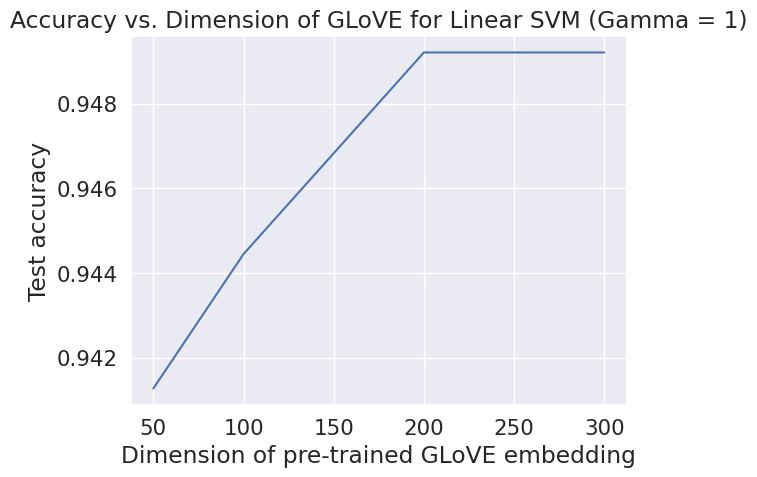

In [ ]:
dim_list = [50,100,200,300]
plt.plot(dim_list,accu_list_glove)
plt.title('Accuracy vs. Dimension of GLoVE for Linear SVM (Gamma = 1)')
plt.xlabel('Dimension of pre-trained GLoVE embedding')
plt.ylabel('Test accuracy')
plt.show()

In [ ]:
reduced_embedding = umap.UMAP(n_components=2, metric='euclidean').fit(X_train_fit)
print(reduced_embedding.embedding_.shape)

(2520, 2)


In [ ]:
YtrainTextLabel = []
for label in y_train:
    if(label==0):
        YtrainTextLabel.append('Sports')
    else:
        YtrainTextLabel.append('Climate')

s = np.random.normal(0, 1, [4732,300])
s = s / np.linalg.norm(s)
reduced_dim_s = umap.UMAP(n_components=2, metric='cosine').fit(s)


/usr/local/lib/python3.9/dist-packages/umap/plot.py:448: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


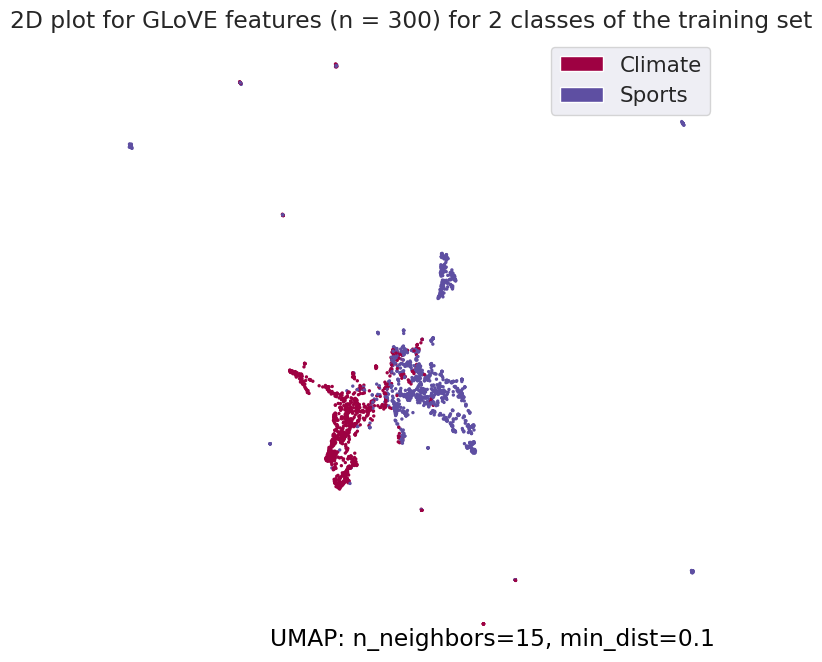

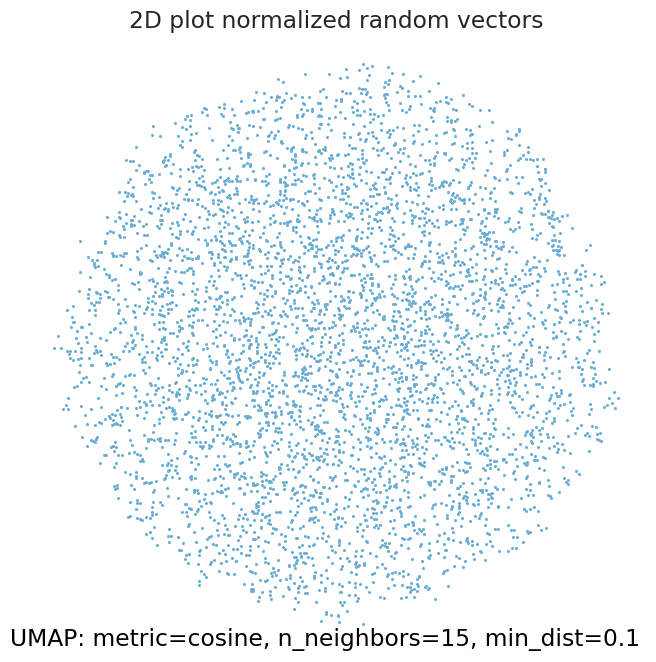

In [ ]:
 f = umap.plot.points(reduced_embedding,labels=np.array(YtrainTextLabel))
 plt.title('2D plot for GLoVE features (n = 300) for 2 classes of the training set')

g = umap.plot.points(reduced_dim_s)
plt.title('2D plot normalized random vectors')
plt.show()